In [1]:
from PIL import Image, ImageDraw

import toyplot.font
import toyplot.text

import IPython.display

import xml.etree.ElementTree as xml
import sys
import logging
logging.basicConfig(level=logging.DEBUG)
toyplot.log.setLevel(logging.DEBUG)

In [2]:
text = "This is <i>italic</i>, <b>bold</b>,<br/>and <code>preformatted</code> text!"
style = {"font-family":"helvetica", "font-size":"16px"}
fonts = toyplot.font.ReportlabLibrary()

layout = toyplot.text.layout(text=text, style=style, fonts=fonts)

DEBUG:toyplot:build formatting model: <Element 'body' at 0x10cae2b10>
DEBUG:toyplot:build formatting model: <Element 'i' at 0x10cae2b50>
DEBUG:toyplot:build formatting model: <Element 'b' at 0x10cae2b90>
DEBUG:toyplot:build formatting model: <Element 'br' at 0x10cae2bd0>
DEBUG:toyplot:build formatting model: <Element 'code' at 0x10cae2c10>
DEBUG:toyplot:create lines
DEBUG:toyplot:compute size: <toyplot.text.Layout object at 0x1030304d0>
DEBUG:toyplot:compute size: <toyplot.text.LineBox object at 0x105749990>
DEBUG:toyplot:compute size: <toyplot.text.TextBox object at 0x10a771910>
DEBUG:toyplot:compute size: <toyplot.text.TextBox object at 0x10cae2dd0>
DEBUG:toyplot:compute size: <toyplot.text.TextBox object at 0x10cae2e10>
DEBUG:toyplot:compute size: <toyplot.text.TextBox object at 0x10cae2e90>
DEBUG:toyplot:compute size: <toyplot.text.TextBox object at 0x10cae2ed0>
DEBUG:toyplot:compute size: <toyplot.text.LineBox object at 0x10ca7d0d0>
DEBUG:toyplot:compute size: <toyplot.text.TextBo

In [3]:
toyplot.text.dump(layout, size=True, style=False)

toyplot.text.Layout 156.528x38.4
  toyplot.text.LineBox 126.256x19.2
    toyplot.text.TextBox 'This is ' 50.672x19.2
    toyplot.text.TextBox 'italic' 32.0x19.2
    toyplot.text.TextBox ', ' 8.896x19.2
    toyplot.text.TextBox 'bold' 30.24x19.2
    toyplot.text.TextBox ',' 4.448x19.2
  toyplot.text.LineBox 156.528x19.2
    toyplot.text.TextBox 'and ' 31.136x19.2
    toyplot.text.TextBox 'preformatted' 90.704x19.2
    toyplot.text.TextBox ' text!' 34.688x19.2


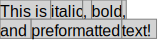

In [4]:
def draw(box, image):
    if isinstance(box, toyplot.text.TextBox):
        print box
        xml.SubElement(
            image,
            "rect",
            x=str(box.left),
            y=str(box.top),
            width=str(box.content_width),
            height=str(box.content_height),
            fill="lightgray",
            stroke="gray",
        )
        
        baseline_offset = (box.style["line-height"] - box.text_height) * 0.5
        #print baseline_offset
        #baseline_offset=0
        
        style = toyplot.style.combine(
            box.style,
            {"white-space":"pre"},
        )
        
        xml.SubElement(
            image,
            "text",
            x=str(box.left),
            y=str(box.bottom - baseline_offset),
            fill="black",
            stroke="none",
            style=toyplot.style.to_css(style),
        ).text = box.text
        
    for child in box.children:
        draw(child, image)

image = xml.Element(
    "svg",
    width=str(int(layout.content_width+10)),
    height=str(int(layout.content_height+10)),
    style="border: 1px solid #f0f0f0",
)
draw(layout, image)
IPython.display.SVG(xml.tostring(image))

In [6]:
IPython.display.HTML(text)